In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


**O dataset utilizado contém informações sobre vinhos do tipo tinto.**

In [13]:
df = pd.read_csv('dataset/winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Verificando se há alguma feature com missing values**

In [16]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Verificando o tipo de cada feature. Caso houvesse alguma feature categórica, um tratamento extra teria que ser feito**

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Observando a distribuição dos scores de qualidade dos vinhos**

Text(0.5, 1.0, 'Distribuição da qualidade de vinho tinto')

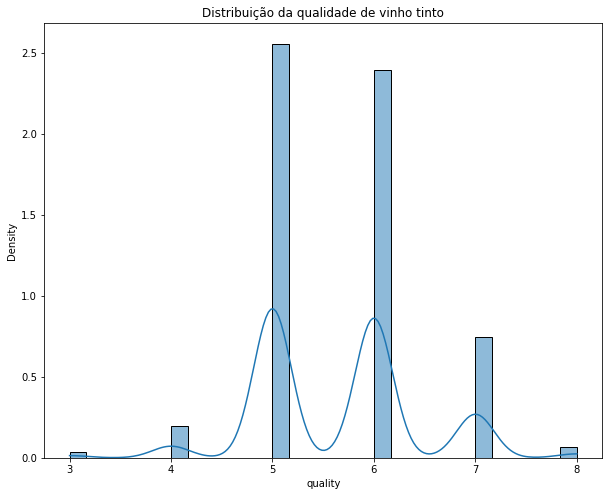

In [41]:
plt.rc('figure', figsize = (10,8))


sns.histplot(df['quality'], kde=True, stat='density')
plt.title('Distribuição da qualidade de vinho tinto')

**Podemos ver que não há registros de vinhos com qualidade 10 ou 0, e a maior parte dos vinhos possui qualidade mediana, 5 ou 6**

**Outra coisa que podemos observar é o boxplot do nosso target para verificar os outliers**

Text(0.5, 1.0, 'Boxplot da qualidade de vinhos tintos')

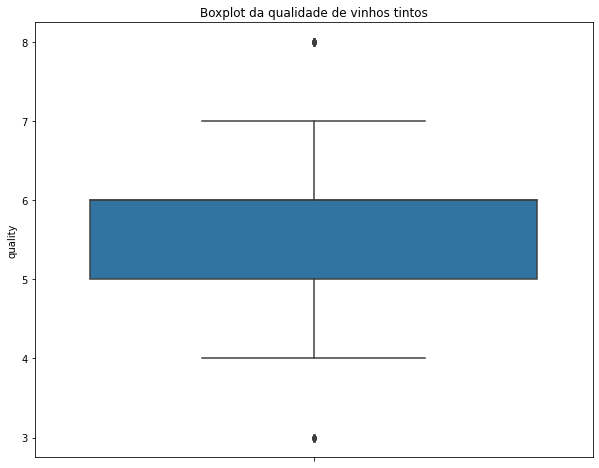

In [42]:
sns.boxplot(y=df['quality'], orient='v')
plt.title('Boxplot da qualidade de vinhos tintos')

**Temos dois valores outliers, 3 e 8, representando respectivamente os vinhos que fogem da média, ou sendo muito bons (8) ou muito ruins(3)**

**Vamos agora analisar como cada feature se correlaciona com nosso target.**

<AxesSubplot:>

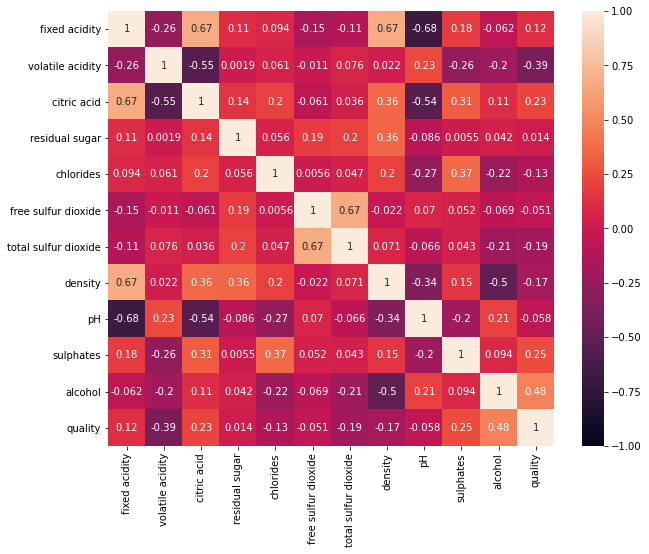

In [44]:
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1)

**Nossa variável target não possui correlação linear forte com nenhuma feature. Com isso, não utilizaremos o método de regressão linear. Iremos utilizar um algoritmo Random Forest (bagging) (ensemble)**

In [84]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [93]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('quality', axis=1), df['quality'], test_size=0.2, random_state=28)

In [95]:
model = RandomForestRegressor()
model_fitted = model.fit(x_train, y_train)
y_pred = model_fitted.predict(x_test)
score = r2_score(y_test, y_pred)

print("{}: {:.6f}, {:.4f}".format('RandomForestRegressor',score.mean(),score.std()))

RandomForestRegressor: 0.543007, 0.0000


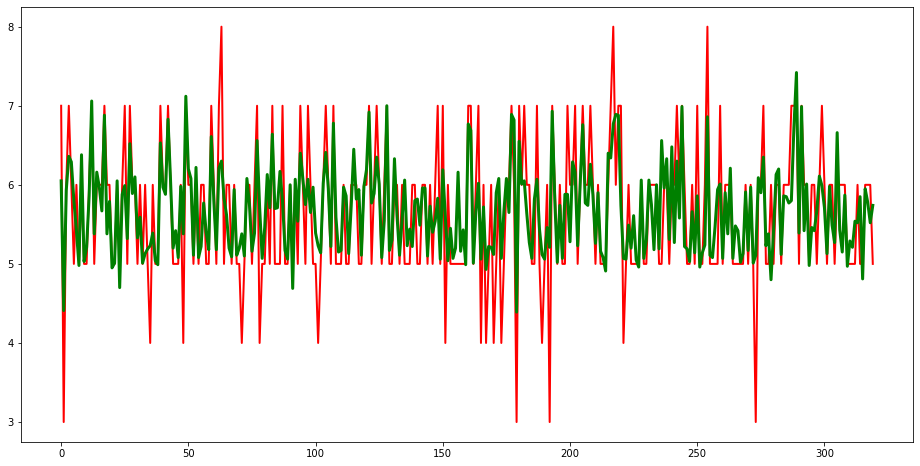

In [97]:
ln_x_test = range(len(x_test))
y_predict = model_fitted.predict(x_test)

plt.figure(figsize=(16,8), facecolor='w')

plt.plot(ln_x_test, y_test, 'r-', lw=2, label=u'Valor')
plt.plot(ln_x_test, y_predict, 'g-', lw=3, label=u'Predição')

**Observamos que o algoritmo de RandomForestRegressor não obteve bons resultados, com uma acurácia de pouco mais de 50%. Futuramente, irei aplicar outros algoritmos e utilizar de alguns métodos como cross validation e hyperparam tunning para optmizar esse modelo**